In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
summary_file_path = "../homfam_refs_benchmark_full/summary/complete_summary_stats_eval.csv"
# read the summary file
df = pd.read_csv(summary_file_path)
# parse arg_aligners and extract everything that is after -lib 
df["libs"] = df['args_aligner'].str.extract(r'-lib(.*)').squeeze().str.strip()

In [23]:
metric = "tc"
#make it 3 columns, id, lib proba_pair, lib proba_pair FSfull_pair, sp
df_plot = df[["id", "libs", metric]]
df_plot = df_plot.drop_duplicates(subset=['id', 'libs'])
df_plot = df_plot.pivot(index='id', columns='libs', values=metric)
df_plot = df_plot.reset_index()
df_plot

libs,id,FSfull_pair,TMalign_pair,proba_pair,proba_pair FSfull_pair,sap_pair
0,Acetyltransf,46.6,29.6,29.6,45.5,29.6
1,Ald_Xan_dh_2,76.7,69.7,69.7,79.4,69.7
2,ChtBD,72.1,90.7,90.7,72.1,90.7
3,DEATH,26.6,23.4,23.4,31.5,23.4
4,DMRL_synthase,68.6,72.8,72.8,72.2,72.8
...,...,...,...,...,...,...
89,tms,82.1,88.4,88.4,86.7,88.4
90,toxin,31.2,54.5,54.5,49.4,54.5
91,trfl,83.5,92.3,92.3,89.3,92.3
92,uce,45.2,57.8,57.8,56.0,57.8


/home/luisasantus/mambaforge/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luisasantus/mambaforge/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


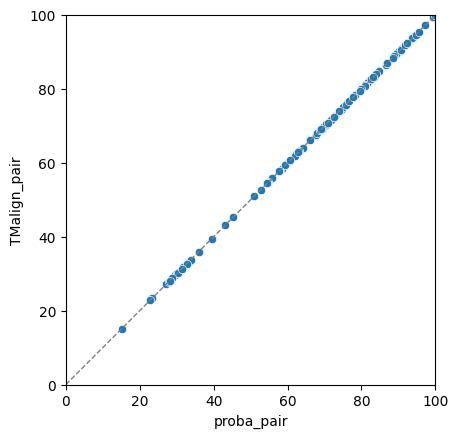

In [24]:
sns.scatterplot(data=df_plot, x="proba_pair", y="TMalign_pair")
# limit the axis
plt.xlim(0, 100)
plt.ylim(0, 100)
# draw the diagonal
plt.plot([0, 100], [0, 100], color='grey', lw=1, ls='--')
# make plot squared
plt.gca().set_aspect('equal', adjustable='box')